In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
import seaborn as sns
sns.set_theme(style="ticks")
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline

### Data Cleaning:

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.rename(columns={'DEATH_EVENT':'death_event'})

# Check for NaN values:
if df.isnull().values.any():
    print('NaN values found.')

# Check for proper one-hot encoding of categorical variables:
cat_var_list = ['anaemia','diabetes','high_blood_pressure','sex','smoking','death_event']
for cat_var in cat_var_list:
    if df[cat_var].nunique() != 2:
        print(cat_var)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


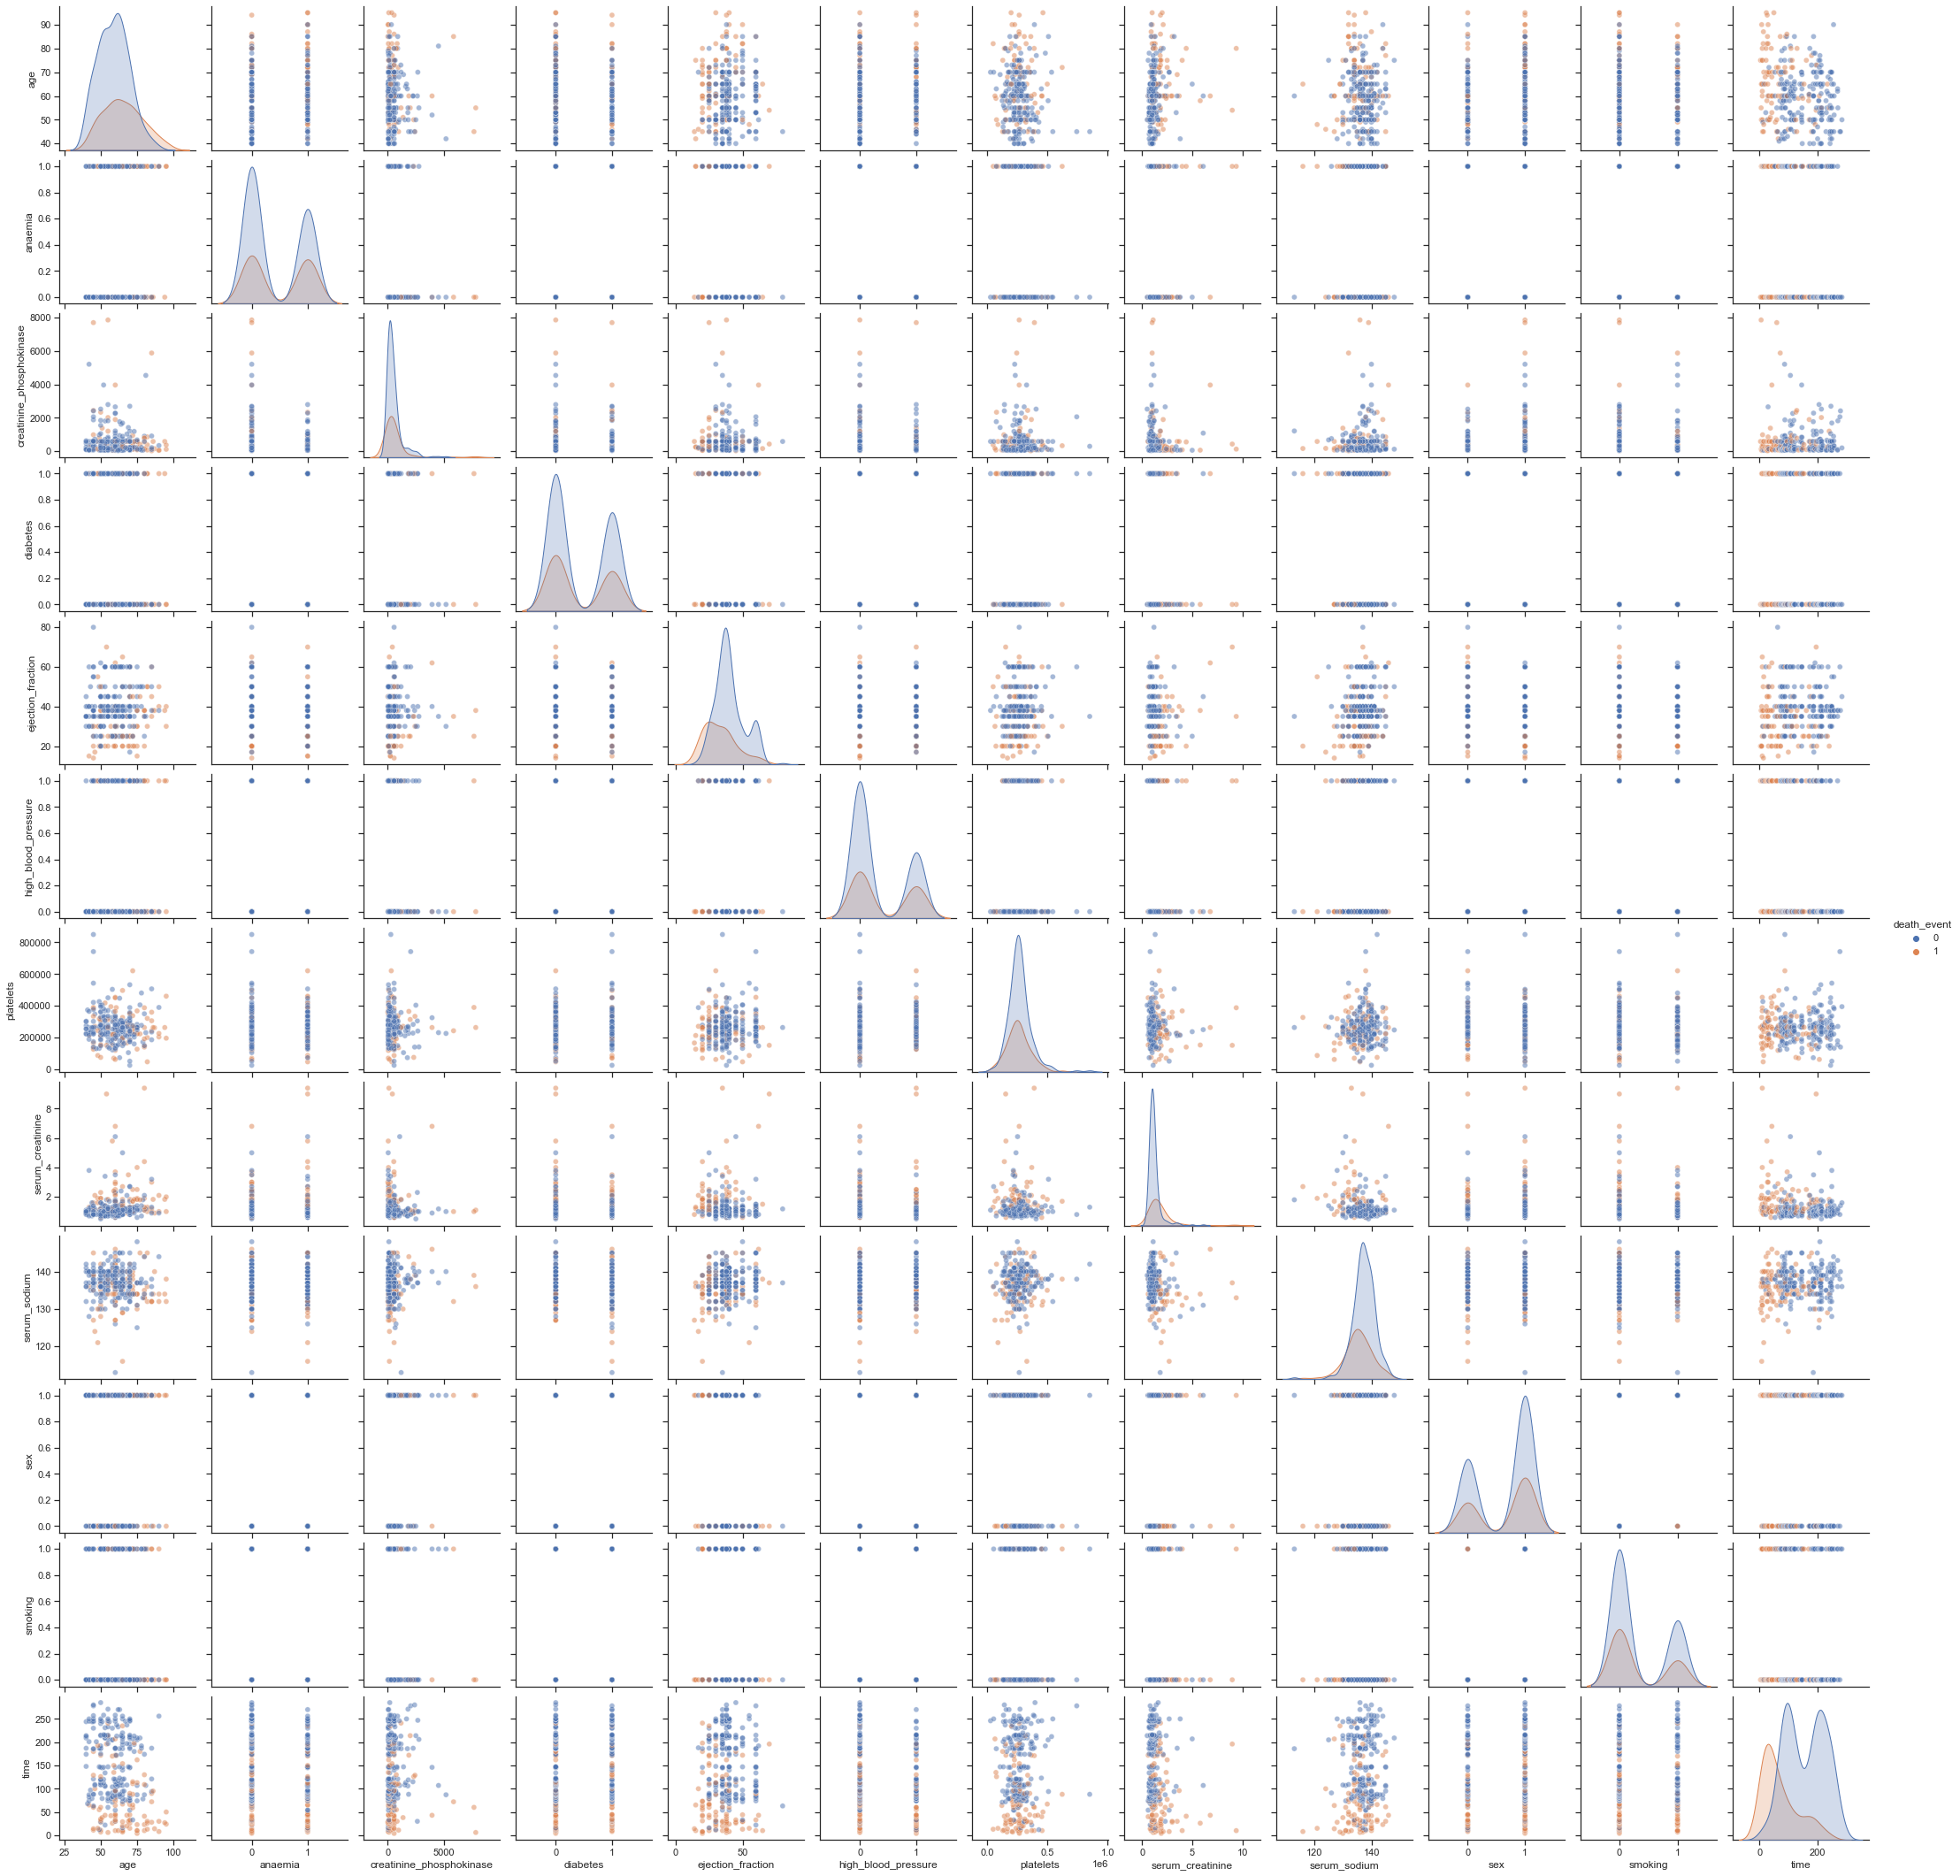

In [3]:
# Define X as the numpy array of data:
df_PCA = df.loc[:,df.columns != 'death_event']
X = df_PCA.to_numpy()
# df_PCA.head()

# Show scatterplot matrix of data labeled by death_event:
ax = sns.pairplot(df, hue='death_event', plot_kws={'alpha':0.5})

### PCA:

In [4]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [5]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [6]:
X_mean = np.mean(X,axis=1)
n = X[0].size

arr_mean = np.repeat(np.reshape(X_mean, (X_mean.size,1)), X.shape[1], axis=1)
# print(arr_mean.shape)

# Create mean-subtracted array:
A = np.subtract(X, arr_mean)
# print(A.shape)

eigvals, V_old = np.linalg.eig(np.matmul(A.T,A))
V, D = eigsort(V_old, eigvals)

U = np.matmul(A,V) # U = A*V
U = normc(U) # Normalize
# print(U.shape)
df_U = pd.DataFrame(U, columns = df_PCA.columns)
df_U.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.054563,-0.004045,0.069570,0.061222,-0.102664,0.006260,-0.013510,0.013907,-0.002195,-0.090491,0.081680,-0.051490
1,-0.054092,-0.432411,0.101539,-0.003015,0.027382,0.006554,0.012306,0.004152,0.041341,0.025110,0.047470,0.025044
2,-0.033358,0.010327,0.034760,0.104735,-0.069230,-0.038343,0.013600,0.093020,-0.035022,0.009490,-0.048581,-0.081271
3,-0.043245,0.017578,0.047633,0.084933,-0.028663,-0.120093,-0.033675,0.013850,0.058937,0.063286,0.070196,0.049444
4,-0.067341,0.027432,0.084671,0.014067,-0.083121,0.004779,-0.071179,-0.083961,-0.017935,0.086741,-0.039184,0.108032


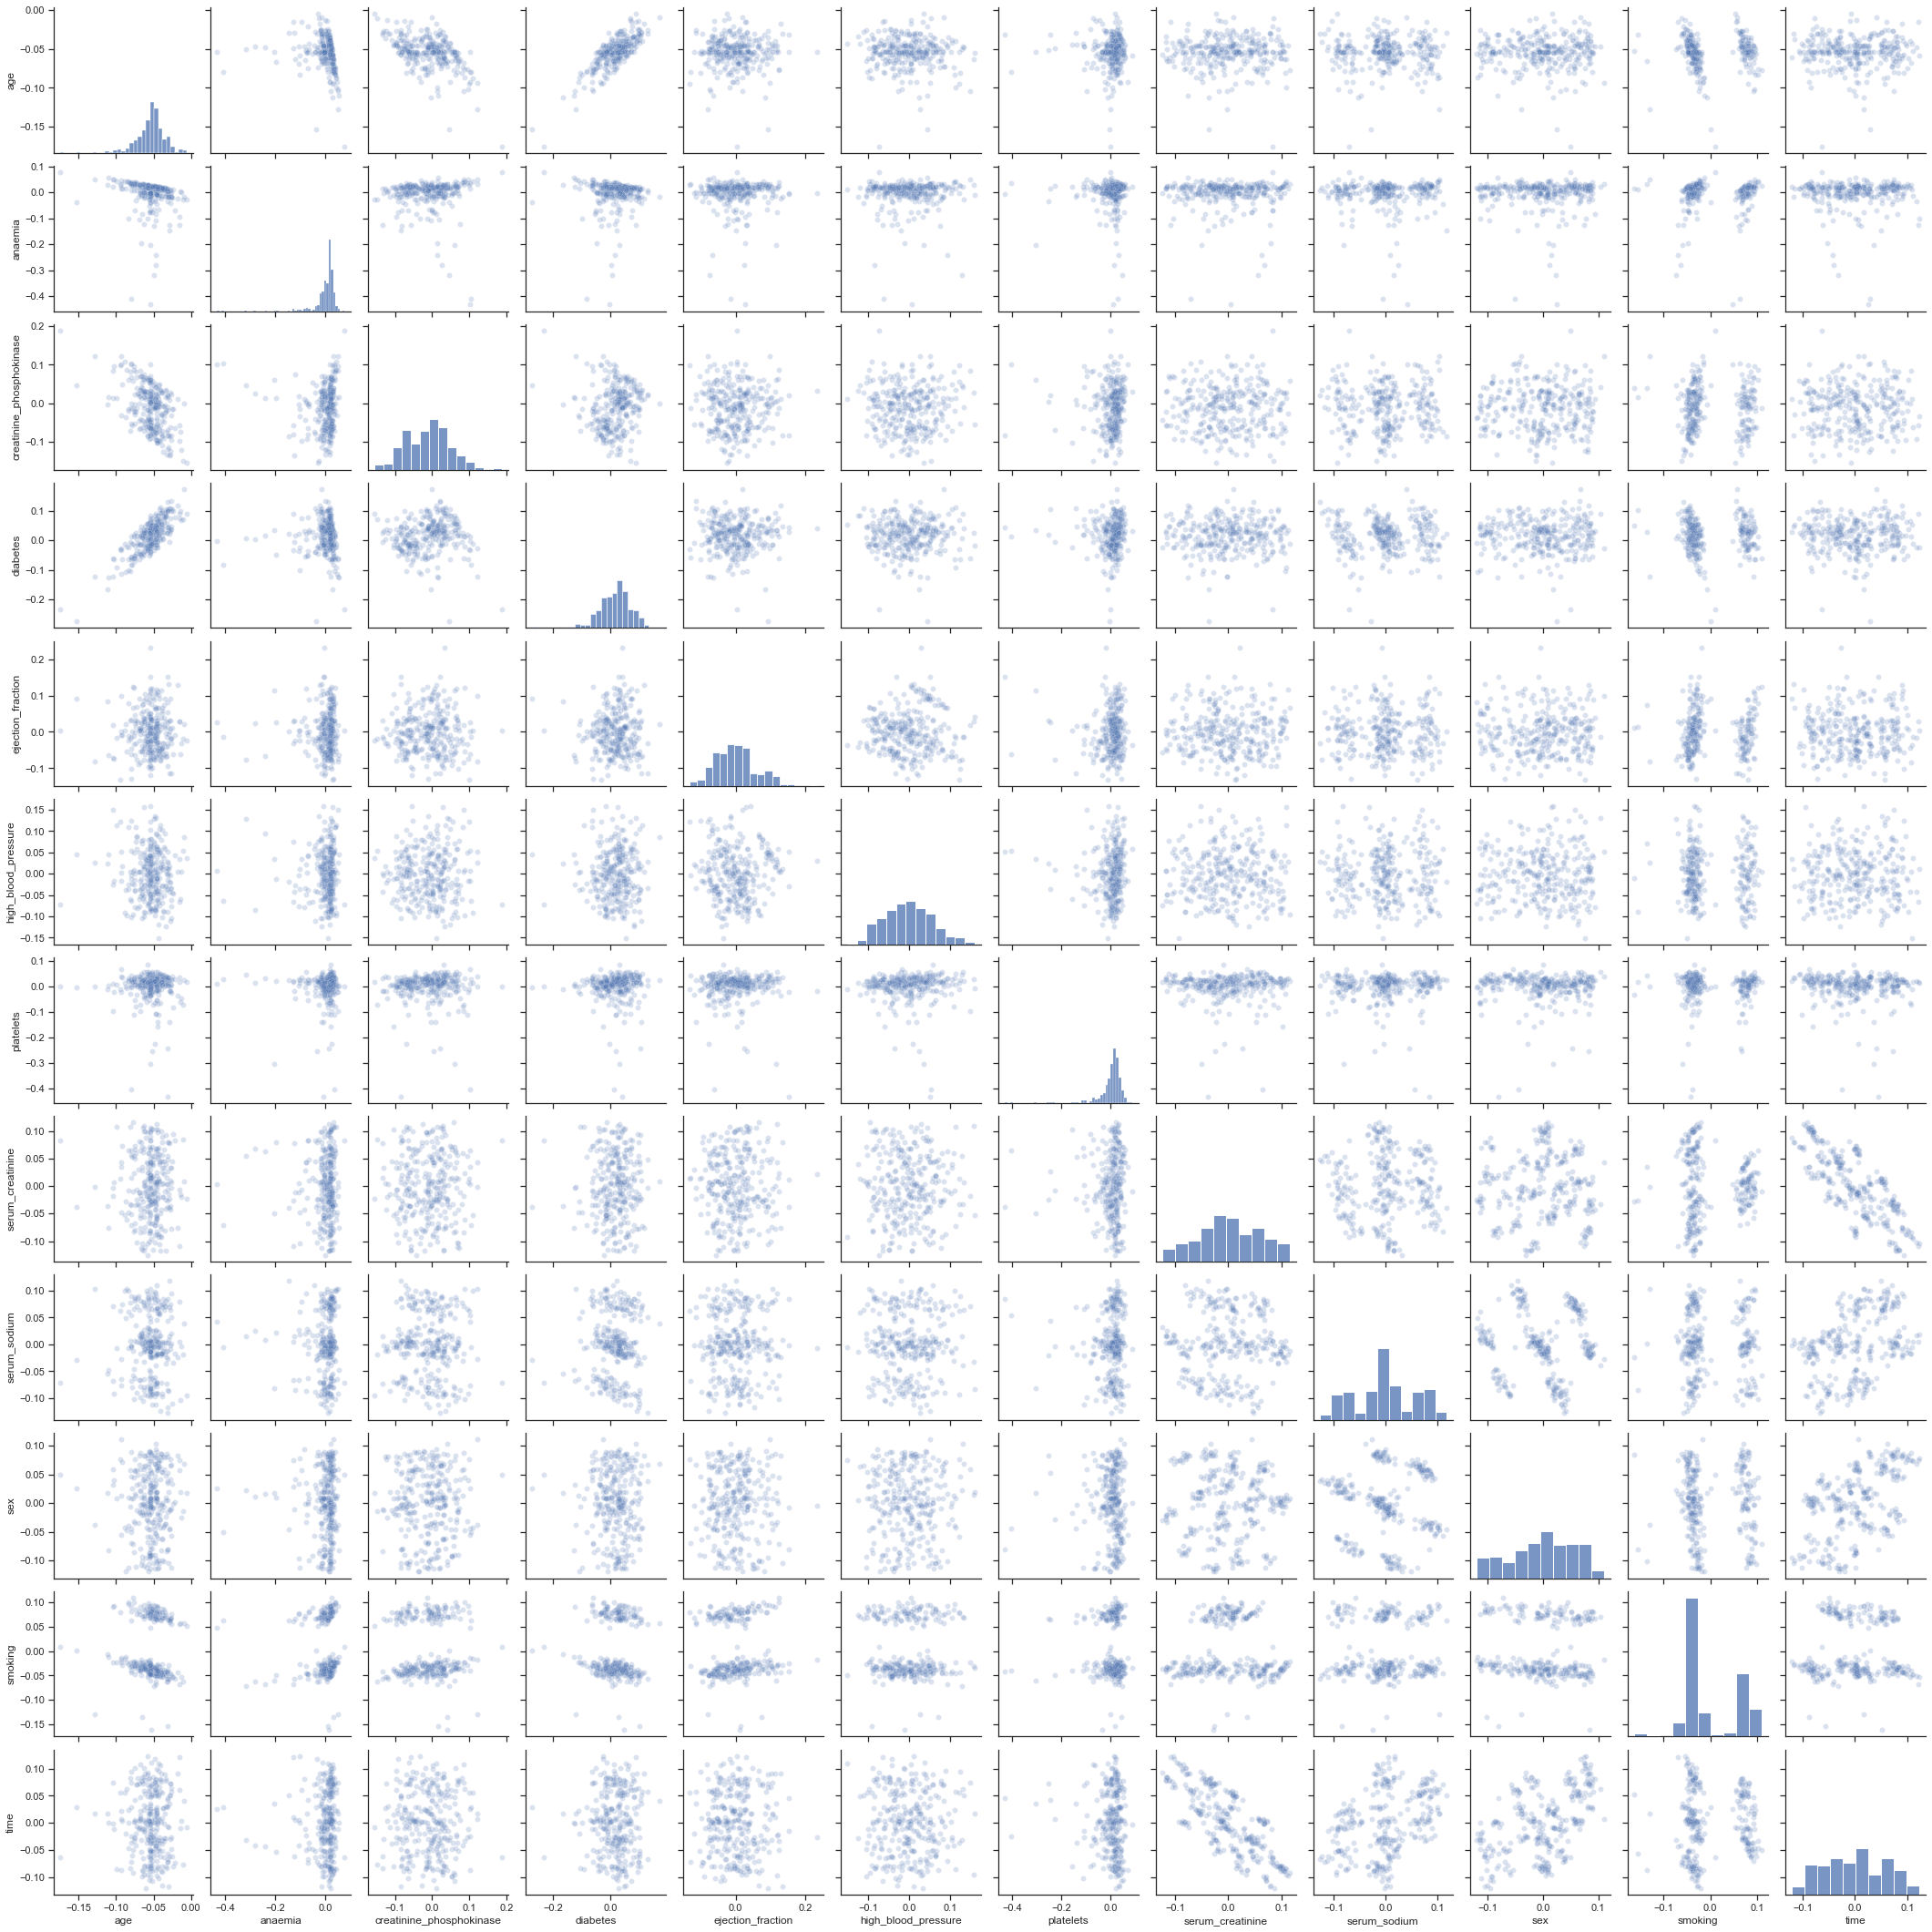

In [7]:
# Scatter plot matrix of PC's:
ax = sns.pairplot(df_U, plot_kws={'alpha':0.2})

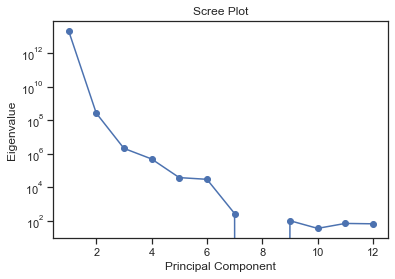

In [8]:
# Scree Plot of Eigenvalues and PC's:
n_PCA = X.shape[1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(n_PCA)+1, eigvals, 'bo-')
ax.set_yscale('log')
ax.set(title="Scree Plot", xlabel="Principal Component", ylabel="Eigenvalue")

plt.show()